In [1]:
import pandas as pd
import pandas as pd
from collections import defaultdict
from sklearn import metrics
import numpy as np
import sys
import time

start_time = time.time()

inbinfile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/insilico/training/bestrefperfforTEST/ROC_plots/BL22_binned/troubleshooting/RelationwithSM/BL22_genepromSM_0.7.txt_TRAININGbestref.txt_result_dupindex_binnedstats.pkl'

outfile=inbinfile


consideringALLheyper=True


inbindf=pd.read_pickle(inbinfile)
####BL22#####
scorecolumns=['NaiveCD4-others','NaiveCD8-others','nB-others','NK-others','PC-others','Mono-others','M0-others','M1-others','M2-others','iDC-others','mDC-others','PMN-others','cm8-others','em8-others','Eo-others','Tregs-others','em4-others','ed8-others','Mg-others','cm4-others','Er-others','mB-others']


#scorecolumns=['CD4-others','CD8-others','nB-others','NK-others','Mn-others','mNeu-others','m8-others','DC-others','Eo-others','Tr-others','m4-others','Mg-others','Er-others','mB-others']

inbindf=inbindf.reset_index()
inbindf.head()

,index,NaiveCD4-others,NaiveCD8-others,nB-others,NK-others,PC-others,Mono-others,M0-others,M1-others,M2-others,...,LENhypoCpG,LENhyperCpG,total_cpg,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename
0,Eo.HWI-ST537:223:C4DVTACXX:7:1211:7435:87447,-0.181992,-0.146024,-0.188627,-0.131008,-0.087008,-0.121579,0.035913,0.019849,0.431214,...,1.0,0.0,1.0,1.0,iDC-others,0.769421,iDC-others,0.769421,iDC-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
1,Eo.HWI-ST537:224:C4E15ACXX:4:2108:11851:51609,-0.078167,-0.018802,-0.051278,-0.062452,-0.053722,-0.026135,-0.065595,-0.078167,-0.053373,...,1.0,0.0,1.0,1.0,PMN-others,0.969452,PMN-others,0.969452,PMN-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
2,Eo.HWI-ST537:224:C4E15ACXX:5:2205:15200:28811,-0.238056,-0.233865,-0.196849,-0.222341,-0.203135,0.735881,0.502960,0.526008,0.567563,...,1.0,0.0,1.0,1.0,Mono-others,0.735881,Mono-others,0.735881,Mono-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
3,Eo.HWI-ST699:234:C48WNACXX:4:2307:17364:71298,-0.095000,-0.117000,0.924333,-0.085222,-0.103381,-0.074397,-0.102333,-0.084175,-0.066365,...,1.0,0.0,1.0,1.0,nB-others,0.924333,nB-others,0.924333,nB-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
4,Eo.HWI-ST731:122:C7CNDACXX:4:2202:4871:39568,-0.048310,0.812135,-0.089167,0.288325,0.107437,-0.092659,-0.130722,-0.130722,-0.107675,...,1.0,0.0,1.0,1.0,NaiveCD8-others,0.812135,NaiveCD8-others,0.812135,NaiveCD8-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...


In [2]:
if consideringALLheyper==True:
    allassigned=inbindf.copy()


elif consideringALLheyper==False:
    allassigned=inbindf[inbindf['deltabasedfragassignment']!='NotAssigned'].copy()
    
else:
    print("wrong input")
    sys.exit(1)
#
allassigned.head()

,index,NaiveCD4-others,NaiveCD8-others,nB-others,NK-others,PC-others,Mono-others,M0-others,M1-others,M2-others,...,LENhypoCpG,LENhyperCpG,total_cpg,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename
0,Eo.HWI-ST537:223:C4DVTACXX:7:1211:7435:87447,-0.181992,-0.146024,-0.188627,-0.131008,-0.087008,-0.121579,0.035913,0.019849,0.431214,...,1.0,0.0,1.0,1.0,iDC-others,0.769421,iDC-others,0.769421,iDC-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
1,Eo.HWI-ST537:224:C4E15ACXX:4:2108:11851:51609,-0.078167,-0.018802,-0.051278,-0.062452,-0.053722,-0.026135,-0.065595,-0.078167,-0.053373,...,1.0,0.0,1.0,1.0,PMN-others,0.969452,PMN-others,0.969452,PMN-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
2,Eo.HWI-ST537:224:C4E15ACXX:5:2205:15200:28811,-0.238056,-0.233865,-0.196849,-0.222341,-0.203135,0.735881,0.502960,0.526008,0.567563,...,1.0,0.0,1.0,1.0,Mono-others,0.735881,Mono-others,0.735881,Mono-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
3,Eo.HWI-ST699:234:C48WNACXX:4:2307:17364:71298,-0.095000,-0.117000,0.924333,-0.085222,-0.103381,-0.074397,-0.102333,-0.084175,-0.066365,...,1.0,0.0,1.0,1.0,nB-others,0.924333,nB-others,0.924333,nB-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...
4,Eo.HWI-ST731:122:C7CNDACXX:4:2202:4871:39568,-0.048310,0.812135,-0.089167,0.288325,0.107437,-0.092659,-0.130722,-0.130722,-0.107675,...,1.0,0.0,1.0,1.0,NaiveCD8-others,0.812135,NaiveCD8-others,0.812135,NaiveCD8-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...


In [3]:
allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','deltabasedfragassignment']=allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','maxscoredCT_beforeCpGweight']

In [4]:
allassigned['secondmaxScore']='Notassigned'
allassigned['secondmaxScoreCT']='Notassigned'
allassigned.head()

,index,NaiveCD4-others,NaiveCD8-others,nB-others,NK-others,PC-others,Mono-others,M0-others,M1-others,M2-others,...,total_cpg,LENhypoCpG_BY_total_cpg,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename,secondmaxScore,secondmaxScoreCT
0,Eo.HWI-ST537:223:C4DVTACXX:7:1211:7435:87447,-0.181992,-0.146024,-0.188627,-0.131008,-0.087008,-0.121579,0.035913,0.019849,0.431214,...,1.0,1.0,iDC-others,0.769421,iDC-others,0.769421,iDC-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,Notassigned,Notassigned
1,Eo.HWI-ST537:224:C4E15ACXX:4:2108:11851:51609,-0.078167,-0.018802,-0.051278,-0.062452,-0.053722,-0.026135,-0.065595,-0.078167,-0.053373,...,1.0,1.0,PMN-others,0.969452,PMN-others,0.969452,PMN-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,Notassigned,Notassigned
2,Eo.HWI-ST537:224:C4E15ACXX:5:2205:15200:28811,-0.238056,-0.233865,-0.196849,-0.222341,-0.203135,0.735881,0.502960,0.526008,0.567563,...,1.0,1.0,Mono-others,0.735881,Mono-others,0.735881,Mono-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,Notassigned,Notassigned
3,Eo.HWI-ST699:234:C48WNACXX:4:2307:17364:71298,-0.095000,-0.117000,0.924333,-0.085222,-0.103381,-0.074397,-0.102333,-0.084175,-0.066365,...,1.0,1.0,nB-others,0.924333,nB-others,0.924333,nB-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,Notassigned,Notassigned
4,Eo.HWI-ST731:122:C7CNDACXX:4:2202:4871:39568,-0.048310,0.812135,-0.089167,0.288325,0.107437,-0.092659,-0.130722,-0.130722,-0.107675,...,1.0,1.0,NaiveCD8-others,0.812135,NaiveCD8-others,0.812135,NaiveCD8-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,Notassigned,Notassigned


In [5]:
grouped=allassigned.groupby('maxscoredCT')

for name, group in grouped:
    
    
    tempscorecolumns=scorecolumns.copy()
    
    tempscorecolumns.remove(name)
    
    allassigned.loc[group.index,'secondmaxScore']=group[tempscorecolumns].max(axis=1)
    allassigned.loc[group.index,'secondmaxScoreCT']=(group[tempscorecolumns]).idxmax(axis=1)

In [6]:
allassigned['adjustedScore_minus']=allassigned['maxscore']-allassigned['secondmaxScore']
allassigned['adjustedScore_minus_avg']=(allassigned['maxscore']+(allassigned['maxscore']-allassigned['secondmaxScore']))/2
allassigned.head()

,index,NaiveCD4-others,NaiveCD8-others,nB-others,NK-others,PC-others,Mono-others,M0-others,M1-others,M2-others,...,maxscoredCT_beforeCpGweight,maxscore_beforeCpGweight,maxscoredCT,maxscore,deltabasedfragassignment,filename,secondmaxScore,secondmaxScoreCT,adjustedScore_minus,adjustedScore_minus_avg
0,Eo.HWI-ST537:223:C4DVTACXX:7:1211:7435:87447,-0.181992,-0.146024,-0.188627,-0.131008,-0.087008,-0.121579,0.035913,0.019849,0.431214,...,iDC-others,0.769421,iDC-others,0.769421,iDC-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.724373,mDC-others,0.0450476,0.407234
1,Eo.HWI-ST537:224:C4E15ACXX:4:2108:11851:51609,-0.078167,-0.018802,-0.051278,-0.062452,-0.053722,-0.026135,-0.065595,-0.078167,-0.053373,...,PMN-others,0.969452,PMN-others,0.969452,PMN-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.0360238,Eo-others,0.933429,0.95144
2,Eo.HWI-ST537:224:C4E15ACXX:5:2205:15200:28811,-0.238056,-0.233865,-0.196849,-0.222341,-0.203135,0.735881,0.502960,0.526008,0.567563,...,Mono-others,0.735881,Mono-others,0.735881,Mono-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.567563,M2-others,0.168317,0.452099
3,Eo.HWI-ST699:234:C48WNACXX:4:2307:17364:71298,-0.095000,-0.117000,0.924333,-0.085222,-0.103381,-0.074397,-0.102333,-0.084175,-0.066365,...,nB-others,0.924333,nB-others,0.924333,nB-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.842619,mB-others,0.0817143,0.503024
4,Eo.HWI-ST731:122:C7CNDACXX:4:2202:4871:39568,-0.048310,0.812135,-0.089167,0.288325,0.107437,-0.092659,-0.130722,-0.130722,-0.107675,...,NaiveCD8-others,0.812135,NaiveCD8-others,0.812135,NaiveCD8-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.288325,NK-others,0.52381,0.667972


In [7]:
allassigned.columns

Index(['index', 'NaiveCD4-others', 'NaiveCD8-others', 'nB-others', 'NK-others',
       'PC-others', 'Mono-others', 'M0-others', 'M1-others', 'M2-others',
       'iDC-others', 'mDC-others', 'PMN-others', 'cm8-others', 'em8-others',
       'Eo-others', 'Tregs-others', 'em4-others', 'ed8-others', 'Mg-others',
       'cm4-others', 'Er-others', 'mB-others', 'LENhypoCpG', 'LENhyperCpG',
       'total_cpg', 'LENhypoCpG_BY_total_cpg', 'maxscoredCT_beforeCpGweight',
       'maxscore_beforeCpGweight', 'maxscoredCT', 'maxscore',
       'deltabasedfragassignment', 'filename', 'secondmaxScore',
       'secondmaxScoreCT', 'adjustedScore_minus', 'adjustedScore_minus_avg'],
      dtype='object')

In [8]:
adjustedScore_minus0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus'].tolist()))
if len(adjustedScore_minus0val)==0:
    pass
elif len(adjustedScore_minus0val)!=1 or adjustedScore_minus0val[0]!=0:
    print(adjustedScore_minus0val)
    sys.exit(1)
    

In [9]:
adjustedScore_minus_avg0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus_avg'].tolist()))


if len(adjustedScore_minus_avg0val)==0:
    pass

elif len(adjustedScore_minus_avg0val)!=1 or adjustedScore_minus_avg0val[0]!=0:
    print(adjustedScore_minus_avg0val)
    sys.exit(1)
    

In [10]:
allassigned['LENhypoCpG_0.8']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG_0.8']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG']

In [11]:
allassigned['LENhypoCpG_0.5']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG_0.5']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG']

In [12]:
allassigned.head()

,index,NaiveCD4-others,NaiveCD8-others,nB-others,NK-others,PC-others,Mono-others,M0-others,M1-others,M2-others,...,maxscoredCT,maxscore,deltabasedfragassignment,filename,secondmaxScore,secondmaxScoreCT,adjustedScore_minus,adjustedScore_minus_avg,LENhypoCpG_0.8,LENhypoCpG_0.5
0,Eo.HWI-ST537:223:C4DVTACXX:7:1211:7435:87447,-0.181992,-0.146024,-0.188627,-0.131008,-0.087008,-0.121579,0.035913,0.019849,0.431214,...,iDC-others,0.769421,iDC-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.724373,mDC-others,0.0450476,0.407234,1.0,1.0
1,Eo.HWI-ST537:224:C4E15ACXX:4:2108:11851:51609,-0.078167,-0.018802,-0.051278,-0.062452,-0.053722,-0.026135,-0.065595,-0.078167,-0.053373,...,PMN-others,0.969452,PMN-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.0360238,Eo-others,0.933429,0.95144,1.0,1.0
2,Eo.HWI-ST537:224:C4E15ACXX:5:2205:15200:28811,-0.238056,-0.233865,-0.196849,-0.222341,-0.203135,0.735881,0.502960,0.526008,0.567563,...,Mono-others,0.735881,Mono-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.567563,M2-others,0.168317,0.452099,1.0,1.0
3,Eo.HWI-ST699:234:C48WNACXX:4:2307:17364:71298,-0.095000,-0.117000,0.924333,-0.085222,-0.103381,-0.074397,-0.102333,-0.084175,-0.066365,...,nB-others,0.924333,nB-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.842619,mB-others,0.0817143,0.503024,1.0,1.0
4,Eo.HWI-ST731:122:C7CNDACXX:4:2202:4871:39568,-0.048310,0.812135,-0.089167,0.288325,0.107437,-0.092659,-0.130722,-0.130722,-0.107675,...,NaiveCD8-others,0.812135,NaiveCD8-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.288325,NK-others,0.52381,0.667972,1.0,1.0


In [13]:
def calposscore(fgrouped,whichmethod,fname):
    ctposscoredict= defaultdict(list)
    totalcpgdict=defaultdict(list)
    hypocpgdict=defaultdict(list)
    hypercpgdict=defaultdict(list)
    
    TPposscoredict=defaultdict(list)
    FPposscoredict=defaultdict(list)
    
    for score in scorecolumns:
        ctname=score.replace('-others','')
        deltabasedfragassigned=fgrouped['deltabasedfragassignment'].tolist()
        if score in deltabasedfragassigned:
            
            runningDF=fgrouped[fgrouped['deltabasedfragassignment']==score]
            
            temp_posscore=runningDF[whichmethod].tolist()
            temptotal_posscore=sum(temp_posscore)
            temp_posfrag=len(temp_posscore)
            
            runningDF_TP=runningDF[runningDF['index'].str.contains(ctname)]
            
            tempTP_score=runningDF_TP[whichmethod].tolist()
            tempTP_totalposscore=sum(tempTP_score)
            
            runningDF_FP=runningDF[~runningDF['index'].str.contains(ctname)]
            
            tempFP_score=runningDF_FP[whichmethod].tolist()
            tempFP_totalposscore=sum(tempFP_score)
            
           
            
            #runningDF_FP=

        else:
            temptotal_posscore=0
            temp_posfrag=0

        

        ctposscoredict[ctname].append(temptotal_posscore)
        
        TPposscoredict[ctname].append(tempTP_totalposscore)
        FPposscoredict[ctname].append(tempFP_totalposscore)
        
 
        
        totalcpgdict[ctname].append(runningDF['total_cpg'].sum())
        hypocpgdict[ctname].append(runningDF['LENhypoCpG'].sum())
        hypercpgdict[ctname].append(runningDF['LENhyperCpG'].sum())
        
        
    ctposscoredf=pd.DataFrame.from_dict(ctposscoredict)
    ctposscoredf['Mixture']=fname

    totalcpgdf=pd.DataFrame.from_dict(totalcpgdict)
    totalcpgdf['Mixture']=fname
    
    hypocpgdf=pd.DataFrame.from_dict(hypocpgdict)
    hypocpgdf['Mixture']=fname
    
    hypercpgdf=pd.DataFrame.from_dict(hypercpgdict)
    hypercpgdf['Mixture']=fname
    
    TPposscoreDF=pd.DataFrame.from_dict(TPposscoredict)
    FPposscoreDF=pd.DataFrame.from_dict(FPposscoredict)
    
    TPposscoreDF['Mixture']=fname
    FPposscoreDF['Mixture']=fname
    
    
   
    return ctposscoredf,totalcpgdf,hypocpgdf,hypercpgdf,TPposscoreDF,FPposscoreDF
        

In [14]:
filegrouped=allassigned.groupby('filename')

maxscorelist=[]
adjustedScore_minuslist=[]
adjustedScore_minus_avglist=[]


alltotalcpg=[]
allhypocpg=[]
allhypercpg=[]


TPscorelist=[]
FPscorelist=[]

for name, group in filegrouped:
    #maxscorelist.append(calposscore(group,'maxscore',name))
    #adjustedScore_minuslist.append(calposscore(group,'adjustedScore_minus',name))
    
    r1,r2,r3,r4,r5,r6=calposscore(group,'adjustedScore_minus_avg',name)
    adjustedScore_minus_avglist.append(r1)
    
    alltotalcpg.append(r2)
    allhypocpg.append(r3)
    allhypercpg.append(r4)
    
    TPscorelist.append(r5)
    FPscorelist.append(r6)
    
                                       
    

In [15]:
'''
maxscorelistDF=pd.concat(maxscorelist)
maxscorelistDF.set_index('Mixture',inplace=True)
adjustedScore_minuslistDF=pd.concat(adjustedScore_minuslist)
adjustedScore_minuslistDF.set_index('Mixture',inplace=True)
'''

adjustedScore_minus_avglistDF=pd.concat(adjustedScore_minus_avglist)
adjustedScore_minus_avglistDF.set_index('Mixture',inplace=True)

In [16]:
alltotalcpgDF=pd.concat(alltotalcpg)
allhypocpgDF=pd.concat(allhypocpg)
allhypercpgDF=pd.concat(allhypercpg)

alltotalcpgDF.set_index('Mixture',inplace=True)
allhypocpgDF.set_index('Mixture',inplace=True)
allhypercpgDF.set_index('Mixture',inplace=True)

In [17]:
'''
maxscorelistDF.to_csv(outfile+'_maxscore_CSxOut.txt',sep="\t")
adjustedScore_minuslistDF.to_csv(outfile+'adjustedScore_minus_CSxOut.txt',sep="\t")
'''

adjustedScore_minus_avglistDF.to_csv(outfile+'adjustedScore_minus_avg_CSxOut.txt',sep="\t")

In [18]:
end_time = time.time()

time_elapsed = (end_time - start_time)

print(time_elapsed)

1.2927851676940918


In [19]:
alltotalcpgDF

,NaiveCD4,NaiveCD8,nB,NK,PC,Mono,M0,M1,M2,iDC,...,cm8,em8,Eo,Tregs,em4,ed8,Mg,cm4,Er,mB
Mixture,,,,,,,,,,,,,,,,,,,,,
BL22test_NR_3215798_insilmix10_sorted_binnedstats.pkl,822.0,228.0,143.0,739.0,116.0,295.0,786.0,158.0,723.0,342.0,...,184.0,73.0,163.0,146.0,76.0,70.0,231.0,86.0,395.0,95.0
BL22test_NR_3215798_insilmix1_sorted_binnedstats.pkl,777.0,212.0,127.0,720.0,113.0,309.0,788.0,172.0,720.0,300.0,...,206.0,86.0,168.0,154.0,77.0,70.0,207.0,79.0,419.0,87.0
BL22test_NR_3215798_insilmix2_sorted_binnedstats.pkl,792.0,226.0,123.0,722.0,124.0,301.0,825.0,162.0,719.0,322.0,...,174.0,80.0,171.0,148.0,90.0,74.0,202.0,86.0,410.0,111.0
BL22test_NR_3215798_insilmix3_sorted_binnedstats.pkl,758.0,184.0,133.0,713.0,123.0,288.0,818.0,166.0,750.0,354.0,...,182.0,80.0,169.0,153.0,91.0,75.0,227.0,89.0,373.0,92.0
BL22test_NR_3215798_insilmix4_sorted_binnedstats.pkl,767.0,212.0,125.0,742.0,113.0,299.0,834.0,152.0,703.0,320.0,...,201.0,62.0,151.0,149.0,88.0,89.0,226.0,87.0,396.0,94.0
BL22test_NR_3215798_insilmix5_sorted_binnedstats.pkl,810.0,226.0,137.0,747.0,126.0,273.0,855.0,170.0,723.0,329.0,...,184.0,70.0,158.0,142.0,94.0,72.0,239.0,91.0,399.0,89.0
BL22test_NR_3215798_insilmix6_sorted_binnedstats.pkl,801.0,224.0,126.0,698.0,106.0,304.0,817.0,172.0,733.0,329.0,...,191.0,78.0,162.0,155.0,71.0,71.0,226.0,86.0,395.0,85.0
BL22test_NR_3215798_insilmix7_sorted_binnedstats.pkl,782.0,230.0,133.0,727.0,116.0,294.0,789.0,156.0,708.0,314.0,...,200.0,80.0,167.0,157.0,90.0,62.0,228.0,79.0,406.0,90.0
BL22test_NR_3215798_insilmix8_sorted_binnedstats.pkl,814.0,217.0,119.0,781.0,115.0,325.0,841.0,179.0,760.0,342.0,...,167.0,82.0,167.0,137.0,92.0,80.0,207.0,105.0,397.0,100.0


In [20]:
allhypocpgDF

,NaiveCD4,NaiveCD8,nB,NK,PC,Mono,M0,M1,M2,iDC,...,cm8,em8,Eo,Tregs,em4,ed8,Mg,cm4,Er,mB
Mixture,,,,,,,,,,,,,,,,,,,,,
BL22test_NR_3215798_insilmix10_sorted_binnedstats.pkl,157.0,39.0,11.0,51.0,7.0,81.0,184.0,33.0,135.0,74.0,...,30.0,21.0,18.0,21.0,12.0,14.0,17.0,23.0,50.0,5.0
BL22test_NR_3215798_insilmix1_sorted_binnedstats.pkl,99.0,29.0,23.0,83.0,4.0,102.0,186.0,36.0,137.0,76.0,...,43.0,34.0,18.0,15.0,10.0,9.0,11.0,12.0,27.0,9.0
BL22test_NR_3215798_insilmix2_sorted_binnedstats.pkl,136.0,30.0,20.0,52.0,10.0,92.0,238.0,40.0,153.0,88.0,...,26.0,25.0,29.0,15.0,11.0,10.0,15.0,13.0,28.0,14.0
BL22test_NR_3215798_insilmix3_sorted_binnedstats.pkl,148.0,31.0,16.0,77.0,4.0,61.0,147.0,27.0,108.0,69.0,...,51.0,29.0,9.0,29.0,20.0,13.0,14.0,22.0,38.0,16.0
BL22test_NR_3215798_insilmix4_sorted_binnedstats.pkl,170.0,35.0,14.0,85.0,8.0,69.0,193.0,34.0,124.0,60.0,...,49.0,24.0,14.0,21.0,21.0,9.0,15.0,24.0,43.0,7.0
BL22test_NR_3215798_insilmix5_sorted_binnedstats.pkl,173.0,28.0,21.0,96.0,5.0,69.0,186.0,34.0,128.0,72.0,...,46.0,23.0,11.0,26.0,22.0,15.0,14.0,25.0,72.0,8.0
BL22test_NR_3215798_insilmix6_sorted_binnedstats.pkl,121.0,31.0,25.0,86.0,5.0,69.0,123.0,24.0,122.0,60.0,...,41.0,29.0,7.0,34.0,11.0,10.0,20.0,21.0,50.0,11.0
BL22test_NR_3215798_insilmix7_sorted_binnedstats.pkl,143.0,31.0,21.0,99.0,5.0,68.0,204.0,27.0,140.0,68.0,...,46.0,25.0,19.0,27.0,17.0,10.0,12.0,21.0,54.0,6.0
BL22test_NR_3215798_insilmix8_sorted_binnedstats.pkl,139.0,36.0,16.0,76.0,4.0,52.0,117.0,13.0,109.0,61.0,...,54.0,29.0,18.0,18.0,17.0,24.0,17.0,25.0,47.0,13.0


In [21]:
allhypercpgDF

,NaiveCD4,NaiveCD8,nB,NK,PC,Mono,M0,M1,M2,iDC,...,cm8,em8,Eo,Tregs,em4,ed8,Mg,cm4,Er,mB
Mixture,,,,,,,,,,,,,,,,,,,,,
BL22test_NR_3215798_insilmix10_sorted_binnedstats.pkl,665.0,189.0,132.0,688.0,109.0,214.0,602.0,125.0,588.0,268.0,...,154.0,52.0,145.0,125.0,64.0,56.0,214.0,63.0,345.0,90.0
BL22test_NR_3215798_insilmix1_sorted_binnedstats.pkl,678.0,183.0,104.0,637.0,109.0,207.0,602.0,136.0,583.0,224.0,...,163.0,52.0,150.0,139.0,67.0,61.0,196.0,67.0,392.0,78.0
BL22test_NR_3215798_insilmix2_sorted_binnedstats.pkl,656.0,196.0,103.0,670.0,114.0,209.0,587.0,122.0,566.0,234.0,...,148.0,55.0,142.0,133.0,79.0,64.0,187.0,73.0,382.0,97.0
BL22test_NR_3215798_insilmix3_sorted_binnedstats.pkl,610.0,153.0,117.0,636.0,119.0,227.0,671.0,139.0,642.0,285.0,...,131.0,51.0,160.0,124.0,71.0,62.0,213.0,67.0,335.0,76.0
BL22test_NR_3215798_insilmix4_sorted_binnedstats.pkl,597.0,177.0,111.0,657.0,105.0,230.0,641.0,118.0,579.0,260.0,...,152.0,38.0,137.0,128.0,67.0,80.0,211.0,63.0,353.0,87.0
BL22test_NR_3215798_insilmix5_sorted_binnedstats.pkl,637.0,198.0,116.0,651.0,121.0,204.0,669.0,136.0,595.0,257.0,...,138.0,47.0,147.0,116.0,72.0,57.0,225.0,66.0,327.0,81.0
BL22test_NR_3215798_insilmix6_sorted_binnedstats.pkl,680.0,193.0,101.0,612.0,101.0,235.0,694.0,148.0,611.0,269.0,...,150.0,49.0,155.0,121.0,60.0,61.0,206.0,65.0,345.0,74.0
BL22test_NR_3215798_insilmix7_sorted_binnedstats.pkl,639.0,199.0,112.0,628.0,111.0,226.0,585.0,129.0,568.0,246.0,...,154.0,55.0,148.0,130.0,73.0,52.0,216.0,58.0,352.0,84.0
BL22test_NR_3215798_insilmix8_sorted_binnedstats.pkl,675.0,181.0,103.0,705.0,111.0,273.0,724.0,166.0,651.0,281.0,...,113.0,53.0,149.0,119.0,75.0,56.0,190.0,80.0,350.0,87.0


In [22]:
smfile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/insilico/training/bestrefperfforTEST/ROC_plots/BL22_binned/troubleshooting/RelationwithSM/BL22_genepromSM_0.7.txt_TRAININGbestref.txt'
smdf=pd.read_csv(smfile,sep="\t",index_col=['chrom','start'])
smdf.head()

NaiveCD4-others  NaiveCD8-others  nB-others  NK-others  \
chrom start                                                               
chr3  48773066          0.023151         0.045151   0.054929   0.051786   
      138232377         0.017310         0.042103   0.071786   0.080865   
chr12 76769087          0.070095         0.011778   0.039714   0.058222   
chr8  23158892          0.073817         0.021087   0.082897   0.058103   
chr5  5463864           0.051214         0.011754   0.031659   0.062040   

                 PC-others  Mono-others  M0-others  M1-others  M2-others  \
chrom start                                                                
chr3  48773066    0.065754     0.032929   0.071690   0.030833   0.046897   
      138232377  -0.010627     0.080865   0.080865   0.002643   0.080865   
chr12 76769087    0.070095     0.046349   0.070095   0.028190   0.034825   
chr8  23158892    0.030865     0.056357   0.068929   0.011310   0.005373   
chr5  5463864     0.047024     0.031310   0.045627   0.019437   0.026770   

                 iDC-others  ...  cm8-others  em8-others  Eo-others  \
chrom start                  ...                                      
chr3  48773066     0.025595  ...    0.071690    0.054929  -0.975929   
      138232377    0.035294  ...    0.080865    0.062008  -0.966754   
chr12 76769087     0.033952  ...    0.054905    0.059619  -0.964952   
chr8  23158892     0.082897  ...    0.062992    0.056706  -0.964722   
chr5  5463864      0.074611  ...    0.051040    0.059421  -0.964103   

                 Tregs-others  em4-others  ed8-others  Mg-others  cm4-others  \
chrom start                                                                    
chr3  48773066       0.071690    0.036595    0.057548   0.071690    0.050214   
      138232377      0.080865    0.054675    0.080865   0.080865    0.080865   
chr12 76769087       0.019286    0.070095    0.037095   0.070095    0.058571   
chr8  23158892       0.070325    0.031563    0.040468   0.060373    0.068230   
chr5  5463864        0.058373    0.059421    0.057325   0.020659    0.042135   

                 Er-others  mB-others  
chrom start                            
chr3  48773066    0.071690   0.034500  
      138232377   0.080865   0.060960  
chr12 76769087    0.070095   0.035524  
chr8  23158892    0.067706   0.042563  
chr5  5463864     0.048944   0.041611  

[5 rows x 22 columns]

In [23]:
smdf['mincolname']=smdf.idxmin(axis=1)
grouped=smdf.groupby('mincolname')
outlist=defaultdict(list)
for name, group in grouped:
    tempct=name.replace('-others','')
    outlist[tempct].append(group.shape[0])
outdf=pd.DataFrame.from_dict(outlist,orient='index',columns=['#CpG'])
outdf.index.name='Celltype'
outdf.head()

,#CpG
Celltype,
Eo,50
Er,100
M0,200
M1,50
M2,200


In [24]:
smdfPMN=smdf[smdf['mincolname']=='PMN-others']
smdfPMN.shape

(25, 23)

In [25]:
alltotalcpgDF['PMN']

Mixture
BL22test_NR_3215798_insilmix10_sorted_binnedstats.pkl    76.0
BL22test_NR_3215798_insilmix1_sorted_binnedstats.pkl     83.0
BL22test_NR_3215798_insilmix2_sorted_binnedstats.pkl     83.0
BL22test_NR_3215798_insilmix3_sorted_binnedstats.pkl     81.0
BL22test_NR_3215798_insilmix4_sorted_binnedstats.pkl     80.0
BL22test_NR_3215798_insilmix5_sorted_binnedstats.pkl     83.0
BL22test_NR_3215798_insilmix6_sorted_binnedstats.pkl     72.0
BL22test_NR_3215798_insilmix7_sorted_binnedstats.pkl     68.0
BL22test_NR_3215798_insilmix8_sorted_binnedstats.pkl     80.0
BL22test_NR_3215798_insilmix9_sorted_binnedstats.pkl     77.0
Name: PMN, dtype: float64

In [26]:
####just testing###

In [27]:
smdfPMNsampled=smdfPMN.sample(n=76,replace=True)
smdfPMNsampled['PMN-others'].sum()*.13

-9.517733333333334

In [28]:
smdfPMNsampled=smdfPMN.sample(n=76,replace=True)
smdfPMNsampled['PMN-others'].sum()

-73.27559523809524

In [29]:
smdfPMNsampled=smdfPMN.sample(n=80,replace=True)
smdfPMNsampled['PMN-others'].sum()*.08

-6.168260952380953

In [30]:
smdfPMNsampled=smdfPMN.sample(n=83,replace=True)
smdfPMNsampled['PMN-others'].sum()*.03

-2.3992414285714276

In [31]:
####just testing###

In [32]:
###prepare maxpossible score###
def maxpossiblescore(fgroupedTotalCpG,fname,smwithmincol):
    ctposscoredict= defaultdict(list)
    
    
    for score in scorecolumns:
        ctname=score.replace('-others','')
        currenttotalCpG=fgroupedTotalCpG[ctname] ###############check. needs to be float, not series
       
        
        corressSM=smwithmincol[smwithmincol['mincolname']==score]
        corressampled=corressSM.sample(n=int(currenttotalCpG),replace=True)
        
        corressscore=-1*corressampled[score].sum()
        
        ctposscoredict[ctname].append(corressscore)
        
        
        
        
        
        
    ctposscoredf=pd.DataFrame.from_dict(ctposscoredict)
    ctposscoredf['Mixture']=fname
    
   

    
   
    return ctposscoredf


In [33]:



maxscorepossible=[]


    
for index, row in alltotalcpgDF.iterrows():
    maxscorepossible.append(maxpossiblescore(row,index,smdf))

maxscorepossibleDF=pd.concat(maxscorepossible)
maxscorepossibleDF.set_index('Mixture',inplace=True)


maxscorepossibleDF['PMN']
 

Mixture
BL22test_NR_3215798_insilmix10_sorted_binnedstats.pkl    73.298286
BL22test_NR_3215798_insilmix1_sorted_binnedstats.pkl     80.049540
BL22test_NR_3215798_insilmix2_sorted_binnedstats.pkl     79.965984
BL22test_NR_3215798_insilmix3_sorted_binnedstats.pkl     78.070254
BL22test_NR_3215798_insilmix4_sorted_binnedstats.pkl     77.132310
BL22test_NR_3215798_insilmix5_sorted_binnedstats.pkl     79.981278
BL22test_NR_3215798_insilmix6_sorted_binnedstats.pkl     69.469556
BL22test_NR_3215798_insilmix7_sorted_binnedstats.pkl     65.537341
BL22test_NR_3215798_insilmix8_sorted_binnedstats.pkl     77.095492
BL22test_NR_3215798_insilmix9_sorted_binnedstats.pkl     74.258881
Name: PMN, dtype: float64

In [34]:
maxscorepossibleDF.head()

,NaiveCD4,NaiveCD8,nB,NK,PC,Mono,M0,M1,M2,iDC,...,cm8,em8,Eo,Tregs,em4,ed8,Mg,cm4,Er,mB
Mixture,,,,,,,,,,,,,,,,,,,,,
BL22test_NR_3215798_insilmix10_sorted_binnedstats.pkl,655.333778,176.072127,133.141373,666.651325,111.884627,217.214032,608.214492,122.929389,581.908087,267.795460,...,141.708294,53.310278,155.196278,119.283548,59.642008,60.762492,211.445611,62.886198,353.126206,88.858746
BL22test_NR_3215798_insilmix1_sorted_binnedstats.pkl,618.805310,163.889595,118.269119,649.739008,109.086476,227.383341,607.942873,134.298762,579.191683,234.905683,...,158.925587,62.863675,159.949230,125.290405,59.697984,60.612762,189.441103,57.881333,375.767992,81.364183
BL22test_NR_3215798_insilmix2_sorted_binnedstats.pkl,631.206524,175.416365,114.459381,650.812921,119.678484,221.108389,636.988897,126.390857,579.691889,251.907532,...,133.911770,59.231254,162.747389,120.397889,70.336349,64.226476,185.161167,63.014294,366.976968,103.823960
BL22test_NR_3215798_insilmix3_sorted_binnedstats.pkl,603.007667,142.741452,123.743079,643.109587,118.755778,211.843746,632.084762,129.999127,603.923008,276.534635,...,140.702571,58.722651,160.862262,124.287135,70.604119,65.008254,207.725722,65.185135,334.117746,86.181984
BL22test_NR_3215798_insilmix4_sorted_binnedstats.pkl,611.032111,164.432262,116.249595,669.573794,108.988492,219.507310,643.530222,118.804921,566.407127,251.949270,...,154.662921,45.240206,143.725579,121.313817,68.586746,77.190968,207.068262,63.735071,354.475079,87.927063


In [35]:
gt='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/insilico/training/bestrefperfforTEST/ROC_plots/BL22_binned/troubleshooting/RelationwithSM/BL22Testmixture_outputgt_fract_namechanged.txt'
gtdf=pd.read_csv(gt,sep='\t',index_col=0)
gtdf.head()

,NaiveCD4,NaiveCD8,nB,NK,PC,Mono,M0,M1,M2,iDC,...,cm8,em8,Eo,Tregs,em4,ed8,Mg,cm4,Er,mB
Mixture,,,,,,,,,,,,,,,,,,,,,
BL22test_NR_3215798_insilmix1_sorted_binnedstats.pkl,0.001567,0.008916,0.089903,0.061825,0.050337,0.098178,0.096435,0.015229,0.020884,0.038765,...,0.034814,0.097541,0.051067,0.009634,0.081890,0.036467,0.030411,0.012113,0.001277,0.052114
BL22test_NR_3215798_insilmix2_sorted_binnedstats.pkl,0.019763,0.067135,0.078821,0.008333,0.086130,0.032387,0.090040,0.081458,0.030769,0.040650,...,0.025479,0.094256,0.098377,0.016312,0.006932,0.002470,0.070859,0.007504,0.001665,0.039045
BL22test_NR_3215798_insilmix3_sorted_binnedstats.pkl,0.016832,0.063332,0.027583,0.030681,0.036016,0.021821,0.000066,0.057864,0.008802,0.081407,...,0.002127,0.063747,0.016275,0.069077,0.061973,0.081773,0.069628,0.080661,0.017842,0.086525
BL22test_NR_3215798_insilmix4_sorted_binnedstats.pkl,0.025658,0.077149,0.025406,0.039902,0.070235,0.057107,0.062788,0.064365,0.044093,0.019512,...,0.058935,0.021134,0.031924,0.026297,0.066437,0.079915,0.069884,0.085429,0.022945,0.014311
BL22test_NR_3215798_insilmix5_sorted_binnedstats.pkl,0.075323,0.052262,0.046414,0.054890,0.061212,0.003146,0.014326,0.085246,0.012295,0.103779,...,0.018251,0.014336,0.029931,0.055539,0.031640,0.095913,0.002125,0.075938,0.092160,0.023713


In [36]:
scoreprediction_from_ref=maxscorepossibleDF*gtdf
scoreprediction_from_ref.head()

,NaiveCD4,NaiveCD8,nB,NK,PC,Mono,M0,M1,M2,iDC,...,cm8,em8,Eo,Tregs,em4,ed8,Mg,cm4,Er,mB
Mixture,,,,,,,,,,,,,,,,,,,,,
BL22test_NR_3215798_insilmix10_sorted_binnedstats.pkl,30.066255,5.687204,0.601906,4.223919,2.770941,13.965110,45.306039,2.425473,34.101884,20.149464,...,6.454444,1.782432,11.269583,6.621779,1.892283,2.325648,12.172712,4.172276,20.394089,2.817872
BL22test_NR_3215798_insilmix1_sorted_binnedstats.pkl,0.969872,1.461319,10.632797,40.170068,5.491072,22.324063,58.626777,2.045201,12.095628,9.106151,...,5.532908,6.131783,8.168132,1.207072,4.888690,2.210349,5.760999,0.701138,0.479766,4.240204
BL22test_NR_3215798_insilmix2_sorted_binnedstats.pkl,12.474280,11.776548,9.021845,5.423480,10.307881,7.161106,57.354624,10.295573,17.836315,10.240058,...,3.411947,5.582915,16.010607,1.963899,0.487564,0.158663,13.120372,0.472887,0.611039,4.053781
BL22test_NR_3215798_insilmix3_sorted_binnedstats.pkl,10.149701,9.040120,3.413200,19.731039,4.277086,4.622696,0.041890,7.522327,5.316026,22.511836,...,0.299225,3.743386,2.618060,8.585348,4.375575,5.315889,14.463475,5.257866,5.961352,7.456887
BL22test_NR_3215798_insilmix4_sorted_binnedstats.pkl,15.678159,12.685845,2.953458,26.717544,7.654819,12.535314,40.405740,7.646833,24.974512,4.916043,...,9.115098,0.956098,4.588308,3.190211,4.556731,6.168746,14.470798,5.444807,8.133339,1.258326


In [37]:
adjustedScore_minus_avglistDF.head()

,NaiveCD4,NaiveCD8,nB,NK,PC,Mono,M0,M1,M2,iDC,...,cm8,em8,Eo,Tregs,em4,ed8,Mg,cm4,Er,mB
Mixture,,,,,,,,,,,,,,,,,,,,,
BL22test_NR_3215798_insilmix10_sorted_binnedstats.pkl,66.907110,16.941726,6.718210,32.773638,6.589242,32.922021,70.421696,13.174377,64.185649,28.183746,...,12.189979,7.960833,15.650774,8.566724,5.312679,7.119315,12.350144,9.219668,37.414487,3.164370
BL22test_NR_3215798_insilmix1_sorted_binnedstats.pkl,41.127440,11.596523,15.498393,58.237918,3.847409,39.882976,69.910589,13.891842,65.117079,30.113123,...,16.637637,12.438906,15.640941,7.000824,4.372742,3.974370,6.466247,4.763049,14.840815,5.926992
BL22test_NR_3215798_insilmix2_sorted_binnedstats.pkl,58.475985,12.747033,13.915448,33.943132,9.606417,35.474724,90.807778,15.819139,72.510540,34.279252,...,9.800841,9.013937,25.239905,6.231562,4.418713,5.483417,9.629836,5.187321,15.501766,9.540278
BL22test_NR_3215798_insilmix3_sorted_binnedstats.pkl,64.090155,14.476772,9.569448,52.414684,3.785952,24.274788,53.762378,9.931273,50.256091,26.938306,...,20.526967,10.537618,6.334271,14.264484,7.905829,6.000849,10.070286,8.486180,27.740905,10.877816
BL22test_NR_3215798_insilmix4_sorted_binnedstats.pkl,74.087497,15.708789,8.854341,58.242374,7.586710,27.297488,73.648828,12.702414,56.579191,22.422485,...,19.554550,8.912397,11.378925,8.770065,8.555046,4.477853,9.603140,9.287906,31.357940,3.903967


In [38]:
scoreprediction_from_ref_VS_adjustedScore_minus_avglistDF=scoreprediction_from_ref.merge(adjustedScore_minus_avglistDF,left_index=True,right_index=True)
scoreprediction_from_ref_VS_adjustedScore_minus_avglistDF.head()


,NaiveCD4_x,NaiveCD8_x,nB_x,NK_x,PC_x,Mono_x,M0_x,M1_x,M2_x,iDC_x,...,cm8_y,em8_y,Eo_y,Tregs_y,em4_y,ed8_y,Mg_y,cm4_y,Er_y,mB_y
Mixture,,,,,,,,,,,,,,,,,,,,,
BL22test_NR_3215798_insilmix10_sorted_binnedstats.pkl,30.066255,5.687204,0.601906,4.223919,2.770941,13.965110,45.306039,2.425473,34.101884,20.149464,...,12.189979,7.960833,15.650774,8.566724,5.312679,7.119315,12.350144,9.219668,37.414487,3.164370
BL22test_NR_3215798_insilmix1_sorted_binnedstats.pkl,0.969872,1.461319,10.632797,40.170068,5.491072,22.324063,58.626777,2.045201,12.095628,9.106151,...,16.637637,12.438906,15.640941,7.000824,4.372742,3.974370,6.466247,4.763049,14.840815,5.926992
BL22test_NR_3215798_insilmix2_sorted_binnedstats.pkl,12.474280,11.776548,9.021845,5.423480,10.307881,7.161106,57.354624,10.295573,17.836315,10.240058,...,9.800841,9.013937,25.239905,6.231562,4.418713,5.483417,9.629836,5.187321,15.501766,9.540278
BL22test_NR_3215798_insilmix3_sorted_binnedstats.pkl,10.149701,9.040120,3.413200,19.731039,4.277086,4.622696,0.041890,7.522327,5.316026,22.511836,...,20.526967,10.537618,6.334271,14.264484,7.905829,6.000849,10.070286,8.486180,27.740905,10.877816
BL22test_NR_3215798_insilmix4_sorted_binnedstats.pkl,15.678159,12.685845,2.953458,26.717544,7.654819,12.535314,40.405740,7.646833,24.974512,4.916043,...,19.554550,8.912397,11.378925,8.770065,8.555046,4.477853,9.603140,9.287906,31.357940,3.903967


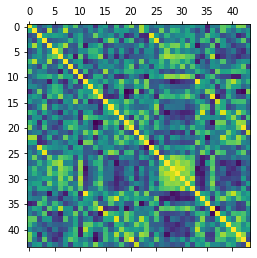

In [39]:
import matplotlib.pyplot as plt
cross_corr=scoreprediction_from_ref_VS_adjustedScore_minus_avglistDF.corr()
plt.matshow(cross_corr)
plt.show()

In [40]:
cross_corr.to_csv(smfile+"_Rresult_prediction_pearson_corresscorr.txt",sep='\t')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


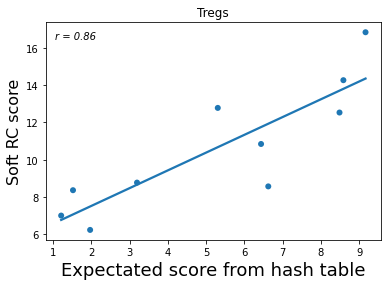

In [41]:
import seaborn as sns
from matplotlib.offsetbox import AnchoredText


celltypetoplot='Tregs'

ax=sns.scatterplot(scoreprediction_from_ref_VS_adjustedScore_minus_avglistDF[celltypetoplot+'_x'], scoreprediction_from_ref_VS_adjustedScore_minus_avglistDF[celltypetoplot+'_y'],edgecolor='none')
ax=sns.regplot(scoreprediction_from_ref_VS_adjustedScore_minus_avglistDF[celltypetoplot+'_x'], scoreprediction_from_ref_VS_adjustedScore_minus_avglistDF[celltypetoplot+'_y'],scatter=False,ci = None)

plt.title(celltypetoplot)
plt.xlabel('Expectated score from hash table', fontsize=18)
plt.ylabel('Soft RC score', fontsize=16)

text='r = %s' % (format(cross_corr[celltypetoplot+'_x'][celltypetoplot+'_y'], '.2f'))


anc = AnchoredText(text, loc="upper left", frameon=False,prop=dict(fontstyle="italic"))
ax.add_artist(anc)


In [42]:
def renamect(act):
    if act=='CD4':
        return 'Naive CD4 T'
    if act=='CD8':
        return 'Naive CD8 T'

    if act=='NaiveCD4':
        return 'Naive CD4 T'
    if act=='NaiveCD8':
        return 'Naive CD8 T'
    if act=='Tr':
        return 'Tregs'
    if act=='mB':
        return 'Memory B'
    if act=='nB':
        return 'Naive B'
    if act=='m4':
        return 'Memory CD4 T'
    if act=='m8':
        return 'Memory CD8 T'
    if act=='Mn':
        return 'Monocytes'


    if act=='em8':
        return 'CD8 TEM'
    if act=='cm8':
        return 'CD8 TCM'

    if act=='em4':
        return 'CD4 TEM'
    if act=='cm4':
        return 'CD4 TCM'


    if act=='ed8':
        return 'CD8 TEMRA'

    if act=='PC':
        return 'PC'

    if act=='M0':
        return 'Mac (M0)'

    if act=='M1':
        return 'Mac (M1)'

    if act=='M2':
        return 'Mac (M2)'
    if act=='Eo':
        return 'Eos'

    if act=='Mg':
        return 'Megakaryocyte'




    return act


In [43]:

def allcor_plots(celltypetoplot,dftouse,cross_corrtouse,wheretosave,WHICHRC):
    plt.figure()
    ax=sns.scatterplot(dftouse[celltypetoplot+'_x'], dftouse[celltypetoplot+'_y'],edgecolor='none')
    ax=sns.regplot(dftouse[celltypetoplot+'_x'], dftouse[celltypetoplot+'_y'],scatter=False,ci = None)

    renamedct=renamect(celltypetoplot)
    plt.title(renamedct)
    plt.xlabel('Expectated score from hash table', fontsize=18)
    plt.ylabel('Soft RC score'+' ('+WHICHRC+')', fontsize=16)

    text='r = %s' % (format(cross_corrtouse[celltypetoplot+'_x'][celltypetoplot+'_y'], '.2f'))


    anc = AnchoredText(text, loc="upper left", frameon=False,prop=dict(fontstyle="italic"))
    ax.add_artist(anc)
    
    savename='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22genepromdelta.7/insilico/training/bestrefperfforTEST/ROC_plots/BL22_binned/troubleshooting/RelationwithSM/'+wheretosave+"/"+renamedct+"_"+WHICHRC+".pdf"
    plt.savefig(savename,dpi=300,bbox_inches="tight")
    
    plt.close()

    

In [44]:
for score in scorecolumns:
    ctname=score.replace('-others','')
    #allcor_plots(ctname)

In [45]:
#adjustedScore_minus_avglistDF=pd.concat(adjustedScore_minus_avglist)
#adjustedScore_minus_avglistDF.set_index('Mixture',inplace=True)

TPscorelistDF=pd.concat(TPscorelist)
FPscorelistDF=pd.concat(FPscorelist)

TPscorelistDF.set_index('Mixture',inplace=True)
FPscorelistDF.set_index('Mixture',inplace=True)
TPscorelistDF.head()

,NaiveCD4,NaiveCD8,nB,NK,PC,Mono,M0,M1,M2,iDC,...,cm8,em8,Eo,Tregs,em4,ed8,Mg,cm4,Er,mB
Mixture,,,,,,,,,,,,,,,,,,,,,
BL22test_NR_3215798_insilmix10_sorted_binnedstats.pkl,13.839739,3.899313,0.749202,3.471456,0.954476,7.155697,17.397893,0.412000,16.445675,7.672857,...,0.467996,1.470964,10.257567,1.339905,1.75956,1.622810,4.837377,3.654306,27.668429,0.881095
BL22test_NR_3215798_insilmix1_sorted_binnedstats.pkl,0.000000,0.465635,10.586810,28.533548,1.902810,11.843038,21.881865,0.412000,7.719187,3.339242,...,0.467996,5.805579,9.327841,0.000000,1.75956,1.622810,2.634984,0.000000,0.000000,3.026016
BL22test_NR_3215798_insilmix2_sorted_binnedstats.pkl,6.498774,4.460583,9.284817,4.362230,6.707341,3.652328,21.498508,4.824155,10.052984,3.339242,...,0.000000,5.805579,20.238421,0.000000,1.75956,0.000000,4.837377,0.000000,0.000000,3.026016
BL22test_NR_3215798_insilmix3_sorted_binnedstats.pkl,6.498774,4.460583,2.058730,14.498325,1.902810,1.810697,0.000000,3.211425,2.895210,9.421024,...,0.000000,3.023841,0.933972,5.007345,1.75956,3.586187,4.837377,3.654306,18.674770,6.437948
BL22test_NR_3215798_insilmix4_sorted_binnedstats.pkl,8.858119,4.460583,2.058730,17.501865,3.810151,6.707269,15.674325,3.629373,13.560310,2.912405,...,1.017206,1.103425,4.567440,0.835131,1.75956,3.586187,4.837377,3.654306,18.674770,0.000000


In [46]:
FPscorelistDF.head()

,NaiveCD4,NaiveCD8,nB,NK,PC,Mono,M0,M1,M2,iDC,...,cm8,em8,Eo,Tregs,em4,ed8,Mg,cm4,Er,mB
Mixture,,,,,,,,,,,,,,,,,,,,,
BL22test_NR_3215798_insilmix10_sorted_binnedstats.pkl,53.067371,13.042412,5.969008,29.302182,5.634766,25.766324,53.023803,12.762377,47.739974,20.510889,...,11.721983,6.489869,5.393207,7.226819,3.553119,5.496506,7.512767,5.565362,9.746059,2.283274
BL22test_NR_3215798_insilmix1_sorted_binnedstats.pkl,41.127440,11.130888,4.911583,29.704370,1.944599,28.039937,48.028724,13.479842,57.397893,26.773880,...,16.169641,6.633327,6.313100,7.000824,2.613183,2.351561,3.831263,4.763049,14.840815,2.900976
BL22test_NR_3215798_insilmix2_sorted_binnedstats.pkl,51.977212,8.286449,4.630631,29.580902,2.899075,31.822396,69.309270,10.994984,62.457555,30.940009,...,9.800841,3.208357,5.001485,6.231562,2.659154,5.483417,4.792459,5.187321,15.501766,6.514263
BL22test_NR_3215798_insilmix3_sorted_binnedstats.pkl,57.591381,10.016188,7.510718,37.916359,1.883143,22.464091,53.762378,6.719848,47.360880,17.517282,...,20.526967,7.513777,5.400298,9.257138,6.146270,2.414662,5.232909,4.831874,9.066136,4.439868
BL22test_NR_3215798_insilmix4_sorted_binnedstats.pkl,65.229378,11.248206,6.795611,40.740509,3.776560,20.590220,57.974502,9.073041,43.018882,19.510080,...,18.537344,7.808972,6.811485,7.934934,6.795486,0.891667,4.765763,5.633601,12.683170,3.903967


In [47]:
scoreprediction_from_ref_VS_TPscorelistDF=scoreprediction_from_ref.merge(TPscorelistDF,left_index=True,right_index=True)
scoreprediction_from_ref_VS_TPscorelistDF.head()

,NaiveCD4_x,NaiveCD8_x,nB_x,NK_x,PC_x,Mono_x,M0_x,M1_x,M2_x,iDC_x,...,cm8_y,em8_y,Eo_y,Tregs_y,em4_y,ed8_y,Mg_y,cm4_y,Er_y,mB_y
Mixture,,,,,,,,,,,,,,,,,,,,,
BL22test_NR_3215798_insilmix10_sorted_binnedstats.pkl,30.066255,5.687204,0.601906,4.223919,2.770941,13.965110,45.306039,2.425473,34.101884,20.149464,...,0.467996,1.470964,10.257567,1.339905,1.75956,1.622810,4.837377,3.654306,27.668429,0.881095
BL22test_NR_3215798_insilmix1_sorted_binnedstats.pkl,0.969872,1.461319,10.632797,40.170068,5.491072,22.324063,58.626777,2.045201,12.095628,9.106151,...,0.467996,5.805579,9.327841,0.000000,1.75956,1.622810,2.634984,0.000000,0.000000,3.026016
BL22test_NR_3215798_insilmix2_sorted_binnedstats.pkl,12.474280,11.776548,9.021845,5.423480,10.307881,7.161106,57.354624,10.295573,17.836315,10.240058,...,0.000000,5.805579,20.238421,0.000000,1.75956,0.000000,4.837377,0.000000,0.000000,3.026016
BL22test_NR_3215798_insilmix3_sorted_binnedstats.pkl,10.149701,9.040120,3.413200,19.731039,4.277086,4.622696,0.041890,7.522327,5.316026,22.511836,...,0.000000,3.023841,0.933972,5.007345,1.75956,3.586187,4.837377,3.654306,18.674770,6.437948
BL22test_NR_3215798_insilmix4_sorted_binnedstats.pkl,15.678159,12.685845,2.953458,26.717544,7.654819,12.535314,40.405740,7.646833,24.974512,4.916043,...,1.017206,1.103425,4.567440,0.835131,1.75956,3.586187,4.837377,3.654306,18.674770,0.000000


In [48]:
scoreprediction_from_ref_VS_FPscorelistDF=scoreprediction_from_ref.merge(FPscorelistDF,left_index=True,right_index=True)
scoreprediction_from_ref_VS_FPscorelistDF.head()

,NaiveCD4_x,NaiveCD8_x,nB_x,NK_x,PC_x,Mono_x,M0_x,M1_x,M2_x,iDC_x,...,cm8_y,em8_y,Eo_y,Tregs_y,em4_y,ed8_y,Mg_y,cm4_y,Er_y,mB_y
Mixture,,,,,,,,,,,,,,,,,,,,,
BL22test_NR_3215798_insilmix10_sorted_binnedstats.pkl,30.066255,5.687204,0.601906,4.223919,2.770941,13.965110,45.306039,2.425473,34.101884,20.149464,...,11.721983,6.489869,5.393207,7.226819,3.553119,5.496506,7.512767,5.565362,9.746059,2.283274
BL22test_NR_3215798_insilmix1_sorted_binnedstats.pkl,0.969872,1.461319,10.632797,40.170068,5.491072,22.324063,58.626777,2.045201,12.095628,9.106151,...,16.169641,6.633327,6.313100,7.000824,2.613183,2.351561,3.831263,4.763049,14.840815,2.900976
BL22test_NR_3215798_insilmix2_sorted_binnedstats.pkl,12.474280,11.776548,9.021845,5.423480,10.307881,7.161106,57.354624,10.295573,17.836315,10.240058,...,9.800841,3.208357,5.001485,6.231562,2.659154,5.483417,4.792459,5.187321,15.501766,6.514263
BL22test_NR_3215798_insilmix3_sorted_binnedstats.pkl,10.149701,9.040120,3.413200,19.731039,4.277086,4.622696,0.041890,7.522327,5.316026,22.511836,...,20.526967,7.513777,5.400298,9.257138,6.146270,2.414662,5.232909,4.831874,9.066136,4.439868
BL22test_NR_3215798_insilmix4_sorted_binnedstats.pkl,15.678159,12.685845,2.953458,26.717544,7.654819,12.535314,40.405740,7.646833,24.974512,4.916043,...,18.537344,7.808972,6.811485,7.934934,6.795486,0.891667,4.765763,5.633601,12.683170,3.903967


In [49]:
cross_corrwithTP=scoreprediction_from_ref_VS_TPscorelistDF.corr()
cross_corrwithFP=scoreprediction_from_ref_VS_FPscorelistDF.corr()

In [50]:
for score in scorecolumns:
    ctname=score.replace('-others','')
    allcor_plots(ctname,scoreprediction_from_ref_VS_TPscorelistDF,cross_corrwithTP,'TP_corr','TP')
    allcor_plots(ctname,scoreprediction_from_ref_VS_FPscorelistDF,cross_corrwithFP,'FP_corr','FP')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an

In [51]:
forTP_FPfragdf=allassigned.copy()
forTP_FPfragdf.shape

(42711, 39)

In [52]:
forTP_FPfragdf=forTP_FPfragdf.loc[forTP_FPfragdf['adjustedScore_minus_avg'] > 0]
forTP_FPfragdf.shape

(8276, 39)

In [53]:
forTP_FPfragdf[['deltabasedfragassignment_no_other', 'fsltu']] = forTP_FPfragdf['deltabasedfragassignment'].str.split('-', expand=True)
forTP_FPfragdf.head()

,index,NaiveCD4-others,NaiveCD8-others,nB-others,NK-others,PC-others,Mono-others,M0-others,M1-others,M2-others,...,deltabasedfragassignment,filename,secondmaxScore,secondmaxScoreCT,adjustedScore_minus,adjustedScore_minus_avg,LENhypoCpG_0.8,LENhypoCpG_0.5,deltabasedfragassignment_no_other,fsltu
0,Eo.HWI-ST537:223:C4DVTACXX:7:1211:7435:87447,-0.181992,-0.146024,-0.188627,-0.131008,-0.087008,-0.121579,0.035913,0.019849,0.431214,...,iDC-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.724373,mDC-others,0.0450476,0.407234,1.0,1.0,iDC,others
1,Eo.HWI-ST537:224:C4E15ACXX:4:2108:11851:51609,-0.078167,-0.018802,-0.051278,-0.062452,-0.053722,-0.026135,-0.065595,-0.078167,-0.053373,...,PMN-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.0360238,Eo-others,0.933429,0.95144,1.0,1.0,PMN,others
2,Eo.HWI-ST537:224:C4E15ACXX:5:2205:15200:28811,-0.238056,-0.233865,-0.196849,-0.222341,-0.203135,0.735881,0.502960,0.526008,0.567563,...,Mono-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.567563,M2-others,0.168317,0.452099,1.0,1.0,Mono,others
3,Eo.HWI-ST699:234:C48WNACXX:4:2307:17364:71298,-0.095000,-0.117000,0.924333,-0.085222,-0.103381,-0.074397,-0.102333,-0.084175,-0.066365,...,nB-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.842619,mB-others,0.0817143,0.503024,1.0,1.0,nB,others
4,Eo.HWI-ST731:122:C7CNDACXX:4:2202:4871:39568,-0.048310,0.812135,-0.089167,0.288325,0.107437,-0.092659,-0.130722,-0.130722,-0.107675,...,NaiveCD8-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.288325,NK-others,0.52381,0.667972,1.0,1.0,NaiveCD8,others


In [54]:
TPdflist=[]
FPdflist=[]

for score in scorecolumns:
    ctname=score.replace('-others','')
    currentdfforTPFP=forTP_FPfragdf[forTP_FPfragdf['deltabasedfragassignment']==score]
    currentTPdf=currentdfforTPFP[currentdfforTPFP['index'].str.contains(ctname)]
    currentFPdf=currentdfforTPFP[~currentdfforTPFP['index'].str.contains(ctname)]
    TPdflist.append(currentTPdf)
    FPdflist.append(currentFPdf)

In [55]:
outTPdf=pd.concat(TPdflist)
outFPdf=pd.concat(FPdflist)
outTPdf.head()

,index,NaiveCD4-others,NaiveCD8-others,nB-others,NK-others,PC-others,Mono-others,M0-others,M1-others,M2-others,...,deltabasedfragassignment,filename,secondmaxScore,secondmaxScoreCT,adjustedScore_minus,adjustedScore_minus_avg,LENhypoCpG_0.8,LENhypoCpG_0.5,deltabasedfragassignment_no_other,fsltu
253,NaiveCD4.HWI-7001432L_73:1:2314:10590:47890#12,0.812643,0.709976,-0.160246,-0.099135,-0.152913,-0.130563,-0.162690,-0.079929,-0.077833,...,NaiveCD4-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.709976,NaiveCD8-others,0.102667,0.457655,1.0,1.0,NaiveCD4,others
254,NaiveCD4.HWI-ST1450_140:8:2312:2080:62501#12,1.553413,1.336206,-0.264206,-0.109857,-0.232429,-0.142333,-0.104619,-0.167127,-0.199254,...,NaiveCD4-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,1.33621,NaiveCD8-others,0.217206,0.88531,2.0,2.0,NaiveCD4,others
257,NaiveCD4.HWI-ST539_167:5:2204:8934:33784#BC4,1.627921,0.901921,-0.314365,-0.225667,-0.218683,-0.300048,-0.262333,-0.194937,-0.223571,...,NaiveCD4-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.901921,NaiveCD8-others,0.726,1.17696,2.0,2.0,NaiveCD4,others
258,NaiveCD4.HWI-ST539_167:7:2312:15177:56033#BC2,0.780952,0.694000,-0.179714,-0.114762,-0.028159,-0.177270,-0.204508,-0.154921,-0.192635,...,NaiveCD4-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.694,NaiveCD8-others,0.0869524,0.433952,1.0,1.0,NaiveCD4,others
259,NaiveCD4.HWI-ST699_224:3:1205:16947:73462#12,4.703095,4.366111,-0.738238,-0.430937,-0.638540,-0.901667,-0.662460,-0.759889,-0.749063,...,NaiveCD4-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,4.36611,NaiveCD8-others,0.336984,2.52004,6.0,6.0,NaiveCD4,others


In [56]:
outFPdf.head()

,index,NaiveCD4-others,NaiveCD8-others,nB-others,NK-others,PC-others,Mono-others,M0-others,M1-others,M2-others,...,deltabasedfragassignment,filename,secondmaxScore,secondmaxScoreCT,adjustedScore_minus,adjustedScore_minus_avg,LENhypoCpG_0.8,LENhypoCpG_0.5,deltabasedfragassignment_no_other,fsltu
11,Er.HWI-ST1450_141:3:2214:9441:21665#9,0.792738,0.077563,-0.151167,-0.093897,-0.070500,-0.119389,-0.113103,-0.040468,-0.075040,...,NaiveCD4-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.466754,cm4-others,0.325984,0.559361,1.0,1.0,NaiveCD4,others
12,Er.HWI-ST1450_141:8:2105:12460:23755#9,1.796923,1.400530,-0.312589,-0.197875,-0.192637,-0.367851,-0.313899,-0.354756,-0.240042,...,NaiveCD4-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,1.40053,NaiveCD8-others,0.396393,1.09666,0.0,3.0,NaiveCD4,others
16,Er.HWI-ST537_174:7:2312:17772:54361#8,0.783286,0.655825,-0.191000,-0.042238,-0.076460,-0.197984,-0.177730,-0.189603,-0.188556,...,NaiveCD4-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.655825,NaiveCD8-others,0.12746,0.455373,1.0,1.0,NaiveCD4,others
27,Er.HWI-ST539_177:2:2109:17842:45321#8,0.818532,0.302929,-0.166405,0.366484,-0.157675,-0.185262,-0.162913,-0.170246,-0.148944,...,NaiveCD4-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.366484,NK-others,0.452048,0.63529,1.0,1.0,NaiveCD4,others
81,M2.HWI-ST1450_140:1:1205:15689:16558#18,0.785135,0.647897,-0.195437,-0.080548,0.525675,-0.211500,-0.182516,-0.209754,-0.167500,...,NaiveCD4-others,BL22test_NR_3215798_insilmix6_sorted_binnedsta...,0.647897,NaiveCD8-others,0.137238,0.461187,1.0,1.0,NaiveCD4,others


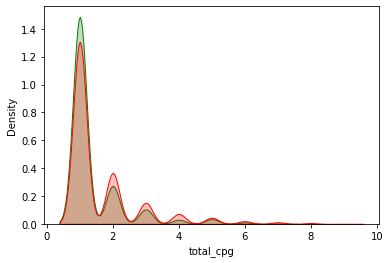

In [57]:
sns.kdeplot(outTPdf['total_cpg'],label='TP_fragment', shade=True,color='green')
sns.kdeplot(outFPdf['total_cpg'],label='FP_fragment', shade=True,color='red')

In [58]:
#sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']=='PMN']['total_cpg'],label='TP_fragment', shade=True,color='green')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


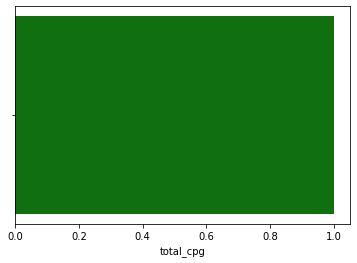

In [59]:
sns.barplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']=='PMN']['total_cpg'],label='TP_fragment', color='green')

In [60]:
outTPdf[outTPdf['deltabasedfragassignment_no_other']=='PMN']['LENhypoCpG'].max()

1.0

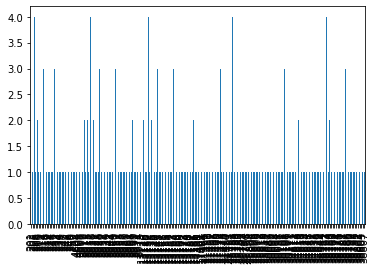

In [61]:
outTPdf[outTPdf['deltabasedfragassignment_no_other']=='NK']['total_cpg'].plot.bar()

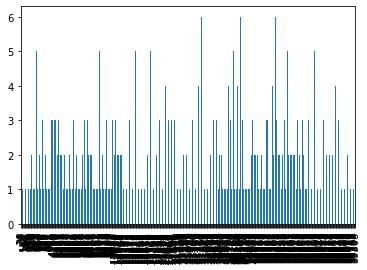

In [62]:
outFPdf[outFPdf['deltabasedfragassignment_no_other']=='NK']['total_cpg'].plot.bar()

In [63]:
outFPdf.columns

Index(['index', 'NaiveCD4-others', 'NaiveCD8-others', 'nB-others', 'NK-others',
       'PC-others', 'Mono-others', 'M0-others', 'M1-others', 'M2-others',
       'iDC-others', 'mDC-others', 'PMN-others', 'cm8-others', 'em8-others',
       'Eo-others', 'Tregs-others', 'em4-others', 'ed8-others', 'Mg-others',
       'cm4-others', 'Er-others', 'mB-others', 'LENhypoCpG', 'LENhyperCpG',
       'total_cpg', 'LENhypoCpG_BY_total_cpg', 'maxscoredCT_beforeCpGweight',
       'maxscore_beforeCpGweight', 'maxscoredCT', 'maxscore',
       'deltabasedfragassignment', 'filename', 'secondmaxScore',
       'secondmaxScoreCT', 'adjustedScore_minus', 'adjustedScore_minus_avg',
       'LENhypoCpG_0.8', 'LENhypoCpG_0.5', 'deltabasedfragassignment_no_other',
       'fsltu'],
      dtype='object')

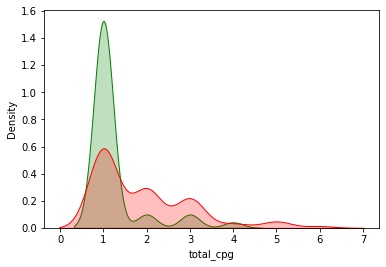

In [64]:
sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']=='NK']['total_cpg'],label='TP_fragment', shade=True,color='green')
sns.kdeplot(outFPdf[outFPdf['deltabasedfragassignment_no_other']=='NK']['total_cpg'],label='FP_fragment', shade=True,color='red')

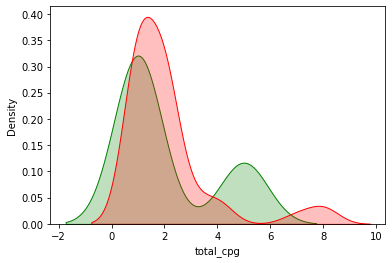

In [65]:
sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']=='NaiveCD8']['total_cpg'],label='TP_fragment', shade=True,color='green')
sns.kdeplot(outFPdf[outFPdf['deltabasedfragassignment_no_other']=='NaiveCD8']['total_cpg'],label='FP_fragment', shade=True,color='red')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


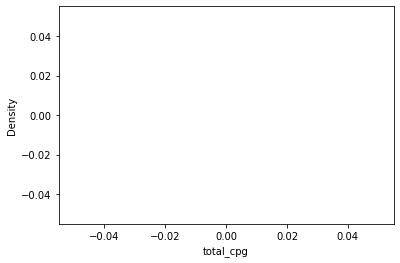

In [66]:
sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']=='PC']['total_cpg'],label='TP_fragment', shade=True,color='green')
sns.kdeplot(outFPdf[outFPdf['deltabasedfragassignment_no_other']=='PC']['total_cpg'],label='FP_fragment', shade=True,color='red')

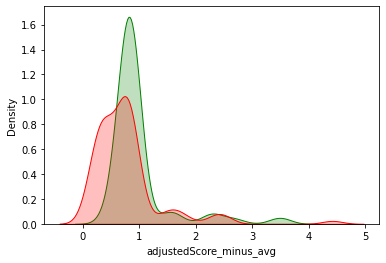

In [67]:
sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']=='NK']['adjustedScore_minus_avg'],label='TP_fragment', shade=True,color='green')
sns.kdeplot(outFPdf[outFPdf['deltabasedfragassignment_no_other']=='NK']['adjustedScore_minus_avg'],label='FP_fragment', shade=True,color='red')

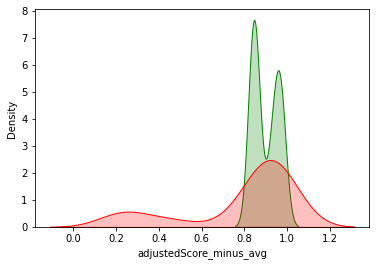

In [68]:
sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']=='PMN']['adjustedScore_minus_avg'],label='TP_fragment', shade=True,color='green')
sns.kdeplot(outFPdf[outFPdf['deltabasedfragassignment_no_other']=='PMN']['adjustedScore_minus_avg'],label='FP_fragment', shade=True,color='red')

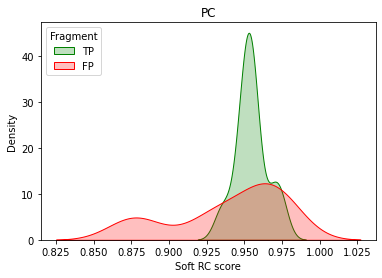

In [69]:
density_celltype='PC'
sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']==density_celltype]['adjustedScore_minus_avg'],label='TP', shade=True,color='green')
sns.kdeplot(outFPdf[outFPdf['deltabasedfragassignment_no_other']==density_celltype]['adjustedScore_minus_avg'],label='FP', shade=True,color='red')
plt.legend(loc='upper left',title='Fragment')
plt.xlabel('Soft RC score')
plt.title(density_celltype)
plt.savefig(inbinfile+density_celltype+'_density_softrc.pdf', bbox_inches='tight')

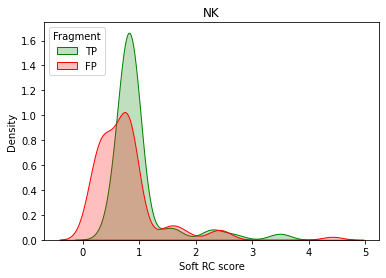

In [70]:
density_celltype='NK'
sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']==density_celltype]['adjustedScore_minus_avg'],label='TP', shade=True,color='green')
sns.kdeplot(outFPdf[outFPdf['deltabasedfragassignment_no_other']==density_celltype]['adjustedScore_minus_avg'],label='FP', shade=True,color='red')
plt.legend(loc='upper left',title='Fragment')
plt.xlabel('Soft RC score')
plt.title(density_celltype)
plt.savefig(inbinfile+density_celltype+'_density_softrc.pdf', bbox_inches='tight')

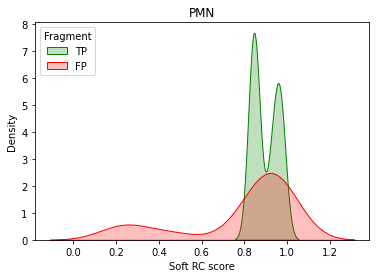

In [71]:
density_celltype='PMN'
sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']==density_celltype]['adjustedScore_minus_avg'],label='TP', shade=True,color='green')
sns.kdeplot(outFPdf[outFPdf['deltabasedfragassignment_no_other']==density_celltype]['adjustedScore_minus_avg'],label='FP', shade=True,color='red')
plt.legend(loc='upper left',title='Fragment')
plt.xlabel('Soft RC score')
plt.title(density_celltype)
plt.savefig(inbinfile+density_celltype+'_density_softrc.pdf', bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


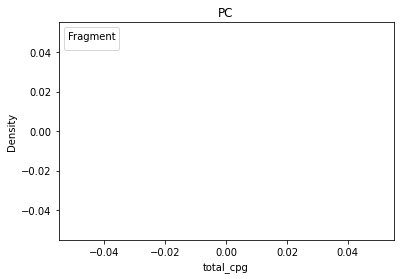

In [72]:
density_celltype='PC'
sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']==density_celltype]['total_cpg'],label='TP', shade=True,color='green')
sns.kdeplot(outFPdf[outFPdf['deltabasedfragassignment_no_other']==density_celltype]['total_cpg'],label='FP', shade=True,color='red')
plt.legend(loc='upper left',title='Fragment')
plt.xlabel('total_cpg')
plt.title(density_celltype)
plt.savefig(inbinfile+density_celltype+'_density_total_cpg.pdf', bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


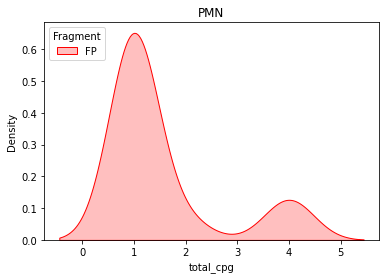

In [73]:
density_celltype='PMN'
sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']==density_celltype]['total_cpg'],label='TP', shade=True,color='green')
sns.kdeplot(outFPdf[outFPdf['deltabasedfragassignment_no_other']==density_celltype]['total_cpg'],label='FP', shade=True,color='red')
plt.legend(loc='upper left',title='Fragment')
plt.xlabel('total_cpg')
plt.title(density_celltype)
plt.savefig(inbinfile+density_celltype+'_density_total_cpg.pdf', bbox_inches='tight')

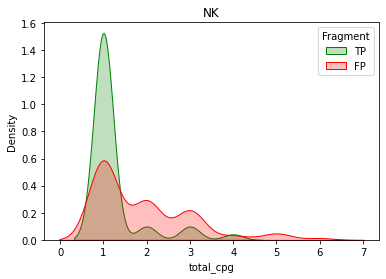

In [74]:
density_celltype='NK'
sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']==density_celltype]['total_cpg'],label='TP', shade=True,color='green')
sns.kdeplot(outFPdf[outFPdf['deltabasedfragassignment_no_other']==density_celltype]['total_cpg'],label='FP', shade=True,color='red')
plt.legend(loc='upper right',title='Fragment')
plt.xlabel('total_cpg')
plt.title(density_celltype)
plt.savefig(inbinfile+density_celltype+'_density_total_cpg.pdf', bbox_inches='tight')

In [75]:
outTPdf['Fragment']='TP'
outFPdf['Fragment']='FP'
outTPdf.shape

(1580, 42)

In [76]:
combinedTPFP=pd.concat([outTPdf,outFPdf])
combinedTPFP.shape

(8276, 42)

In [77]:
combinedTPFP['Cell type']='Undefined'
for index, row in combinedTPFP.iterrows():
    combinedTPFP.loc[index,'Cell type']=renamect(row['deltabasedfragassignment_no_other'])
   


In [78]:
#combinedTPFP['Cell type']

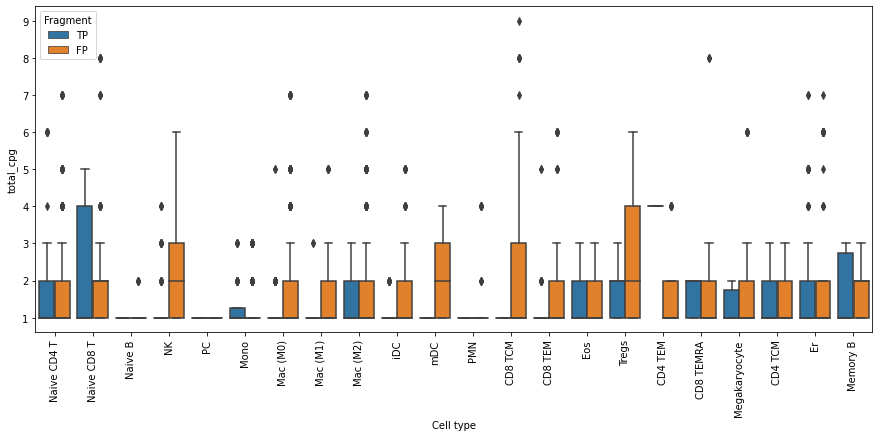

In [79]:
from matplotlib.pyplot import figure
figure(figsize=(15, 6))
ax=sns.boxplot(x='Cell type', y='total_cpg', hue='Fragment',data=combinedTPFP)
#ax=sns.stripplot(x='Cell type', y='total_cpg',hue='Fragment',data=combinedTPFP)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.legend(loc='upper left',title='Fragment')
plt.savefig(inbinfile+'_totalCpG.pdf', bbox_inches='tight')

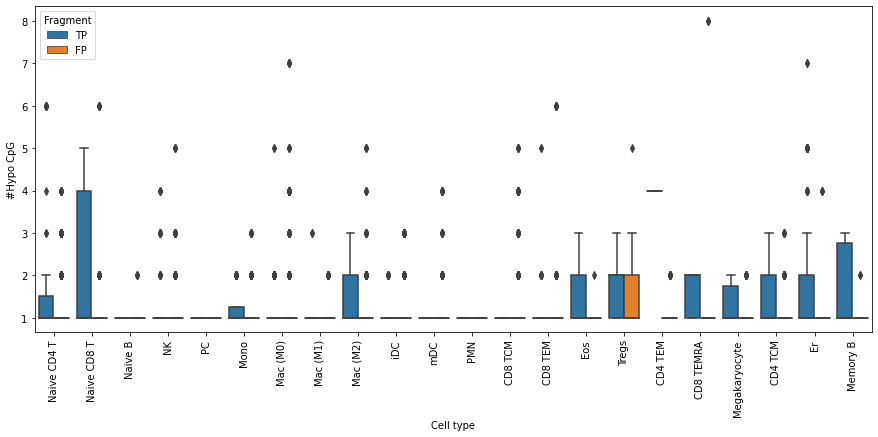

In [82]:
from matplotlib.pyplot import figure
figure(figsize=(15, 6))
ax=sns.boxplot(x='Cell type', y='LENhypoCpG', hue='Fragment',data=combinedTPFP)
#ax=sns.stripplot(x='Cell type', y='total_cpg',hue='Fragment',data=combinedTPFP)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('#Hypo CpG')
plt.legend(loc='upper left',title='Fragment')
plt.savefig(inbinfile+'_LENhypoCpG.pdf', bbox_inches='tight')

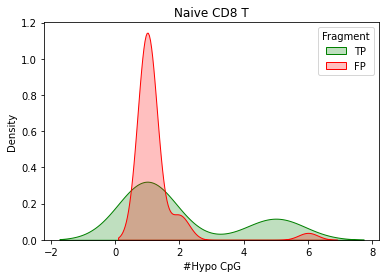

In [88]:
density_celltype='NaiveCD8'
sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']==density_celltype]['LENhypoCpG'],label='TP', shade=True,color='green')
sns.kdeplot(outFPdf[outFPdf['deltabasedfragassignment_no_other']==density_celltype]['LENhypoCpG'],label='FP', shade=True,color='red')
plt.legend(loc='upper right',title='Fragment')
plt.xlabel('#Hypo CpG')
plt.title(renamect(density_celltype))
plt.savefig(inbinfile+density_celltype+'_density_LENhypoCpG.pdf', bbox_inches='tight')

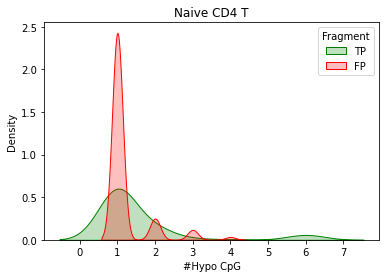

In [87]:
density_celltype='NaiveCD4'
sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']==density_celltype]['LENhypoCpG'],label='TP', shade=True,color='green')
sns.kdeplot(outFPdf[outFPdf['deltabasedfragassignment_no_other']==density_celltype]['LENhypoCpG'],label='FP', shade=True,color='red')
plt.legend(loc='upper right',title='Fragment')
plt.xlabel('#Hypo CpG')
plt.title(renamect(density_celltype))
plt.savefig(inbinfile+density_celltype+'_density_LENhypoCpG.pdf', bbox_inches='tight')

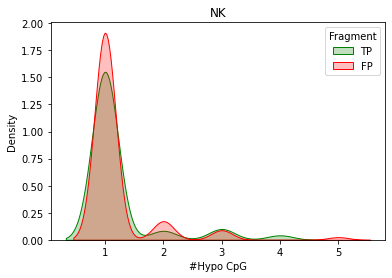

In [89]:
density_celltype='NK'
sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']==density_celltype]['LENhypoCpG'],label='TP', shade=True,color='green')
sns.kdeplot(outFPdf[outFPdf['deltabasedfragassignment_no_other']==density_celltype]['LENhypoCpG'],label='FP', shade=True,color='red')
plt.legend(loc='upper right',title='Fragment')
plt.xlabel('#Hypo CpG')
plt.title(density_celltype)
plt.savefig(inbinfile+density_celltype+'_density_LENhypoCpG.pdf', bbox_inches='tight')

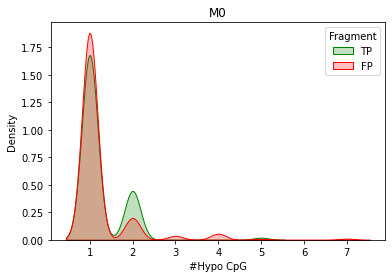

In [90]:
density_celltype='M0'
sns.kdeplot(outTPdf[outTPdf['deltabasedfragassignment_no_other']==density_celltype]['LENhypoCpG'],label='TP', shade=True,color='green')
sns.kdeplot(outFPdf[outFPdf['deltabasedfragassignment_no_other']==density_celltype]['LENhypoCpG'],label='FP', shade=True,color='red')
plt.legend(loc='upper right',title='Fragment')
plt.xlabel('#Hypo CpG')
plt.title(density_celltype)
plt.savefig(inbinfile+density_celltype+'_density_LENhypoCpG.pdf', bbox_inches='tight')

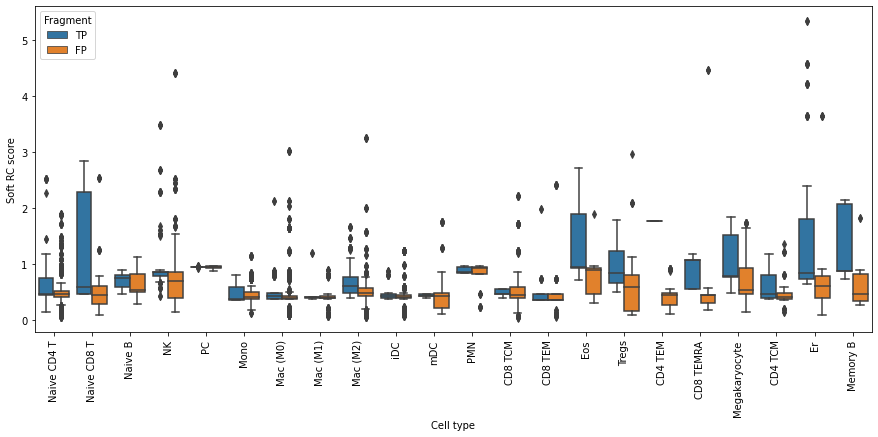

In [81]:

figure(figsize=(15, 6))
ax=sns.boxplot(x='Cell type', y='adjustedScore_minus_avg', hue='Fragment',data=combinedTPFP)
#ax=sns.stripplot(x='Cell type', y='total_cpg',hue='Fragment',data=combinedTPFP)
ax.set_ylabel('Soft RC score')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.legend(loc='upper left',title='Fragment')
plt.savefig(inbinfile+'_totalSoftRCscore.pdf', bbox_inches='tight')